# Tutorial on the Fluorescence Dataset
This notebook illustrates how to get started with the fluorescence dataset, providing a walkthrough of its structure.

## Imports

In [ ]:
!git clone https://github.com/JeroFotinos/hist_via_cluster.git

fatal: destination path 'hist_via_cluster' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('/content/hist_via_cluster')

import sys
sys.path.append('/content/hist_via_cluster')

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# From the repository of the dataset, we import the function that
# loads the fluorescence dataset
from src.load_dataset import load_fluorescence

In [ ]:
!pwd

/content/hist_via_cluster


In [ ]:
!ls

data		       hist_via_cluster  pics	    requirements.txt
getting_started.ipynb  LICENSE		 README.md  src


## Loading the Dataset

The function may load the dataset in a number of ways. You can always refer to the documentation to see the options available. Besides hovering over the function's name, you can do `help(load_fluorescence)` to get the docstring content, `load_fluorescence?` to also get the signature and location of the function, and `load_fluorescence??` to additionally show the source code.

Let's try `load_fluorescence?` to get the fuction's signature, docstring, location, and type.

In [ ]:
load_fluorescence?

Say, for instance, that we want to load the dataset with the default options. For this, we do the following.

In [ ]:
# We use our function imported from the module
directory = 'data'
dataset = load_fluorescence(directory)

The `load_fluorescence` function follows the conventions fixed by `scikit-learn`, thus returning a `Bunch` object containing the dataset.

In [ ]:
type(dataset)

sklearn.utils._bunch.Bunch

This object also supports conventional attributes, such as `Bunch.DESCR` with a description of the dataset that acts as integrated documentation.

In [ ]:
print(dataset.DESCR)



    Fluorescence Dataset


    Summary
    -------

    This dataset contains fluorescence images for elemental composition
    analysis of mammary gland adenocarcinomas in mice, and images from the
    histological analysis. It contains various mouse samples, each with a
    specific diet, measured at least once. Different measurements of the same
    mouse are indexed by the 'take' attribute. The dataset is structured as a
    `scikit-learn` `Bunch` object, and can optionally include a pandas
    DataFrame with pixels as rows and their data (row, column, mouse, take,
    diet, fluorescence for each element, type of tissue) as columns.


    Experimental Methodology
    ------------------------

    An experimental model was implemented in BALB/C mice through the
    subcutaneous inoculation of transplantable mammary gland adenocarcinoma
    cells. The mice were divided into three dietary groups: one rich in
    omega-3, another rich in omega-6, and a control group without lipid
   

## Exploring the Dataset Structure

Currently, `dataset` was loaded with the default options, i.e., `as_dict=False` and `as_frame=False`. This implies that attributes of the dataset are loaded as NumPy arrays or lists.

In [ ]:
dataset.diet #0 control, 1 omega-3, 2 omega-6

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dataset.diet_names

['control', 'omega3', 'omega6']

In [ ]:
dataset.mouse #numero de raton

array([30, 37, 27, 31, 39, 29, 38, 33, 32, 35, 28, 36,  1, 11, 12,  8,  4,
        1,  6, 12, 10,  7, 10,  9,  2, 19, 15, 18, 14, 17, 16, 21, 23, 25,
       20, 26, 25])

In [ ]:
dataset.element_order #detalles sobre el orden de los elementos medidos en las imagenes de fluoresencia

['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']

In [ ]:
dataset.images #coleccion de matrices 3D que representan las imagenes de fluorescencia

[array([[[3.34318e+08, 1.90803e+07, 4.20136e+07, ..., 0.00000e+00,
          0.00000e+00, 1.09553e+07],
         [2.58177e+08, 1.00998e+06, 4.32842e+07, ..., 0.00000e+00,
          0.00000e+00, 4.73671e+06],
         [2.61338e+08, 5.89598e+06, 5.28065e+07, ..., 0.00000e+00,
          0.00000e+00, 1.29297e+07],
         ...,
         [1.78175e+09, 6.09067e+06, 1.30371e+08, ..., 0.00000e+00,
          0.00000e+00, 6.15833e+07],
         [1.94081e+09, 6.62812e+06, 1.13548e+08, ..., 0.00000e+00,
          1.76152e+07, 6.75812e+07],
         [2.07861e+09, 9.38796e+06, 1.12495e+08, ..., 0.00000e+00,
          2.02652e+07, 1.13527e+08]],
 
        [[3.79567e+08, 0.00000e+00, 6.18097e+07, ..., 0.00000e+00,
          0.00000e+00, 0.00000e+00],
         [3.31185e+08, 1.22659e+06, 6.83738e+07, ..., 0.00000e+00,
          0.00000e+00, 1.51039e+07],
         [3.65725e+08, 1.01696e+06, 4.75813e+07, ..., 0.00000e+00,
          0.00000e+00, 1.86987e+07],
         ...,
         [1.81000e+09, 8.89159e+0

In [ ]:
len(dataset.images)==len(dataset.take)==len(dataset.diet)==len(dataset.mouse) #verifica si las longitudes de los atributos images, take, diet y mouse son todas iguales
#esto se hace para confirmar que los atributos contienen info para el mismo numero de muestras

True

Note that the dataset description specified that:
> if `as_dict` is False, that means that `images[n][0]` is the 2D image for the fluorescence of `element_order[0]`, which is `'Ca'`, of `mouse[n]`, `take[n]` with `diet[n]`.

In [ ]:
sample_number = 3 #numero de muestra 3
element_number = 0 #numero de elemento 0

print(f"Take {dataset.take[sample_number]} of mouse {dataset.mouse[sample_number]}, whose diet was {dataset.diet[sample_number]},")
print(f"had the fluorescence of {dataset.element_order[element_number]} shown in image \n\n{dataset.images[sample_number][element_number]}.")

#Imprime informacion sobre la muestra seleccionada (toma, raton, dieta) y muestra la imagen de fluorescencia correspondiente al elemento y muestra

Take 0 of mouse 31, whose diet was 1,
had the fluorescence of Ca shown in image 

[[4.99613e+08 5.84112e+07 1.24686e+09 2.11092e+07 3.68957e+07 0.00000e+00
  0.00000e+00 6.07647e+07]
 [5.23519e+08 0.00000e+00 5.12422e+09 1.72080e+08 2.76790e+07 0.00000e+00
  1.94452e+07 1.49408e+07]
 [6.50201e+08 2.17309e+05 6.71875e+08 0.00000e+00 1.97242e+07 0.00000e+00
  0.00000e+00 2.88480e+07]
 [7.06692e+08 0.00000e+00 4.86634e+08 0.00000e+00 2.26021e+07 0.00000e+00
  0.00000e+00 5.10353e+07]
 [1.01469e+09 7.55476e+06 3.09713e+08 0.00000e+00 2.18971e+07 0.00000e+00
  0.00000e+00 2.84359e+07]
 [1.18902e+09 2.03638e+07 1.84673e+08 0.00000e+00 1.61237e+07 0.00000e+00
  1.47227e+07 3.51551e+07]
 [1.48900e+09 1.96845e+07 1.77904e+08 0.00000e+00 2.96386e+07 0.00000e+00
  0.00000e+00 4.30089e+07]
 [1.56426e+09 2.86200e+06 1.67072e+08 0.00000e+00 1.77997e+07 0.00000e+00
  0.00000e+00 5.62826e+07]
 [1.88184e+09 2.13024e+05 1.37913e+08 0.00000e+00 3.51407e+05 0.00000e+00
  2.47360e+07 4.96162e+07]
 [1.96234

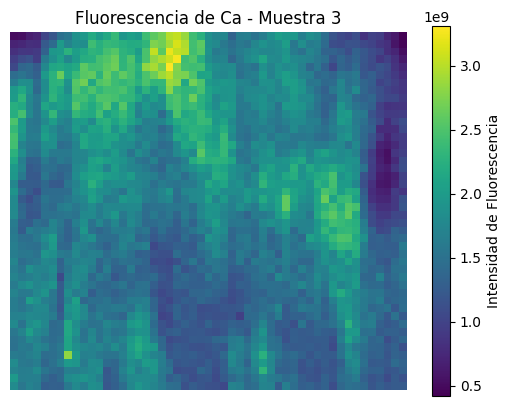

In [ ]:
# Selecciona una muestra y un elemento
sample_number = 3
element_number = 0

# Obtén la imagen de fluorescencia
image_data = dataset.images[sample_number][:, :, element_number]

# Visualiza la imagen usando matplotlib
plt.imshow(image_data, cmap='viridis')
plt.title(f"Fluorescencia de {dataset.element_order[element_number]} - Muestra {sample_number}")
plt.colorbar(label="Intensidad de Fluorescencia")
plt.axis('off') # Oculta los ejes
plt.show()

Note that not all images have the same size.

In [ ]:
for image in dataset.images:
    print(image.shape)

(51, 51, 8)
(51, 51, 8)
(51, 51, 8)
(46, 51, 8)
(101, 101, 8)
(51, 51, 8)
(41, 41, 8)
(51, 51, 8)
(51, 51, 8)
(51, 51, 8)
(118, 121, 8)
(87, 31, 8)
(48, 68, 8)
(51, 51, 8)
(51, 51, 8)
(51, 51, 8)
(101, 101, 8)
(51, 51, 8)
(101, 101, 8)
(51, 51, 8)
(101, 101, 8)
(101, 101, 8)
(51, 51, 8)
(51, 51, 8)
(101, 101, 8)
(51, 56, 8)
(101, 101, 8)
(61, 61, 8)
(101, 101, 8)
(82, 81, 8)
(51, 51, 8)
(51, 26, 8)
(93, 81, 8)
(51, 51, 8)
(21, 21, 8)
(51, 51, 8)
(51, 51, 8)


## Dataset Images

We have three types of images in the dataset: fluorescence images, which contain the fluorescence for different elements; histological images, which are the optical images taken through a microscope after staining, and are the ones used by the expert to label tissue types; and label images, which contain the labels indicating the type of tissue.

### Fluorescence Images
All samples have fluorescence images for all elements. We can access them using the `dataset.images` attribute.

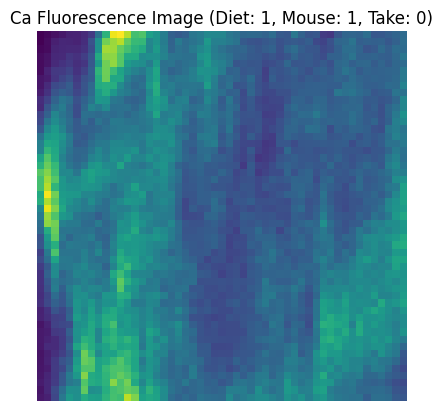

In [ ]:
# Selecting a case
# Let's see where dataset.hist_img is not none
not_none_indexes = [i for i, img in enumerate(dataset.hist_img) if img is not None] #identifica los indices de las muestras que tienen imagenes de histologia disponibles (que no son NONE)

# Retrieve the image from the dataset
m = 0 #selecciona una de estas muestras, en este caso m=0
image = dataset.images[not_none_indexes[m]] #obtiene la imagen de fluorescencia completa en 3D

# Selecting an element
element_number = 0 #selecciona uno de los canales de elementos quimicos de la imagen 3D, en este caso 0 que es Calcio

# Display the image
if image is not None: #verifica si la imagen existe
    # Display the image
    plt.imshow(image[:,:,element_number]) #la muestra
    plt.axis('off')  # Desactiva los ejes para una mejor visualizacion
    plt.title(f"{dataset.element_order[element_number]} Fluorescence Image (Diet: {dataset.diet[not_none_indexes[m]]}, Mouse: {dataset.diet[not_none_indexes[m]]}, Take: {dataset.take[not_none_indexes[m]]})")
    plt.show()
else:
    print("No image found for the specified key).")

In [ ]:
#se muestra una imagen en 2D que representa la distribucion espacial de la fluorescencia de un elemento quimico especifico para una muestra particular que tambien tiene una imagen de histologia disponible.

### Histological Images
We can access the histological images through the `dataset.hist_img` array. As mentioned above, these images are the optical images taken after staining, and are the ones used by the expert to label tissue types. Note that these images are not available for most of the samples.

In [ ]:
# Identifica que imagenes de histologia estan disponibles en el dataset
not_none_indexes = [i for i, img in enumerate(dataset.hist_img) if img is not None] #itera a traves de la lista que contiene las imagenes de histologia, verificando para cada elemento si no es None
print(f'Indexes of not None elements: {not_none_indexes}') #si el elemento no es None, añade su indice a la lista not_none_indexes e imprime la lista
#muestra los indices de las muestras para las cuales hay una imagen de hist disponible


Indexes of not None elements: [8, 16, 24]


In [ ]:
n = not_none_indexes[2] #selecciona el indice de una de las muestras que tienen imagen de histologia disponible (en este caso el tercer indice de la lista de not_none_indexes, ya que m=2)
#imprime informacion detallada sobre esa muestra especifica
print(f'Mouse: {dataset.mouse[n]}') #numero de raton
print(f'Take: {dataset.take[n]}') #numero de la toma o medicion
print(f'Diet: {dataset.diet[n]}') #tipo de dieta (1 es omega 3)
print(f'Hitology image shape: {dataset.hist_img[n].shape}') #dimensiones de la imagen de histologia correspondiente

type(dataset.hist_img[n]) #verifica y muestra el tipo de dato de la imagen de histologia seleccionada, confirmando que es un arreglo de NumPy

Mouse: 2
Take: 0
Diet: 0
Hitology image shape: (257, 268, 3)


numpy.ndarray

In [ ]:
#como vimos antes, la lista dataset.hist_img contiene las img de histologia para cada muestra, pero muchas de ellas son none, porque no hay img disponible
len(dataset.hist_img) #con esto podemos ver cuantos elementos en total de la lista hay, independientemente si tienen o no una imagen asociada

37

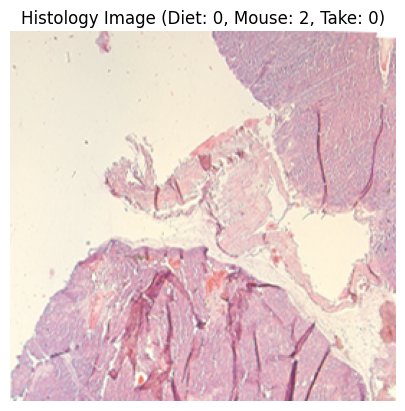

In [ ]:
# Visualiza una de las imagenes de histologia disponibles
m = 2 #selecciona el indice de una muestra que tiene imagen disponible, en este caso el tercer indice de la lista (not_none_indexes) ya que m=2
image = dataset.hist_img[not_none_indexes[m]] #obtiene la imagen correspondiente a ese indice desde dataset.hist_img

if image is not None: #verifica si la imagen existe
    # Display the image
    plt.imshow(image) #la muestra
    plt.axis('off')  # desactiva los ejes para mejor visualizacion
    plt.title(f"Histology Image (Diet: {dataset.diet[not_none_indexes[m]]}, Mouse: {dataset.mouse[not_none_indexes[m]]}, Take: {dataset.take[not_none_indexes[m]]})") #titulo con info (dieta, raton, toma)
    plt.show()
else:
    print("No image found for the specified key).")


In [ ]:
#0 control, 1 omega-3, 2 omega-6

### Label Images
As stated previously, this are the images that indicate the tissue type. Also note that we do not have labels for all images. In fact, since they require manual labeling by an expert, labels are quite scarce.

In [ ]:
# Identifica que imagenes de etiquetas de histologia estan disponibles en el dataset
not_none_label_indexes = [i for i, img in enumerate(dataset.hist_img_labels) if img is not None] #itera a traves de la lista que contiene las imagenes de etiquetas de histologia, para cada elemento verifica si no es none
print(f'Indexes of not None elements: {not_none_label_indexes}') #si el elemento no es none, añade su indice a la lista not_none_label_indexes y lo muestra

Indexes of not None elements: [8, 16, 24]


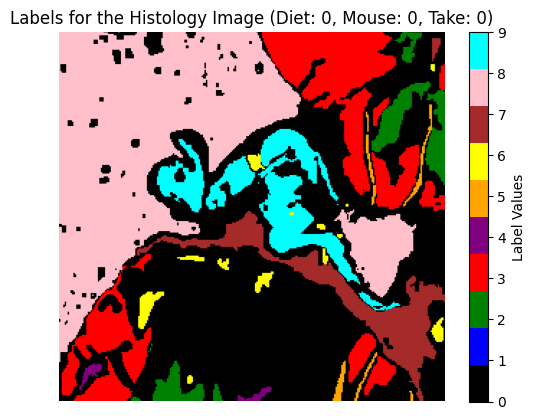

In [ ]:
# Define a custom colormap for 0-9
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan']
custom_cmap = ListedColormap(colors) #define un mapa de colores para visualizar las etiquetas, cada color se asocia a un nro de etiqueta diferente

# Retrieve the labeled image from the dataset
m = 2 #selecciona el indice de una muestra que tiene etiqueta disponible
labels_image = dataset.hist_img_labels[not_none_label_indexes[m]] #obtiene la imagen de etiquetas correspondiente a ese indice

if labels_image is not None: #verifica si la imagen existe
    # Display the labeled image
    plt.imshow(labels_image, cmap=custom_cmap) #la muestra con el mapa de colores personalizado
    plt.axis('off')  # desactiva los ejes
    plt.title(f"Labels for the Histology Image (Diet: {dataset.diet[not_none_label_indexes[m]]}, Mouse: {dataset.diet[not_none_label_indexes[m]]}, Take: {dataset.take[not_none_label_indexes[m]]})") #titulo de imagen con informacion de la muestra
    plt.colorbar(ticks=range(10), label="Label Values")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print("No labeled image found for the specified key.")



## Alternative Dataset Loading Methods

### As Dictionary
Remember that you can always load the dataset with images as values of dictionaries whose keys are the tuples `(diet, mouse, take)`.

In [ ]:
dataset_dict = load_fluorescence(directory, as_dict=True) #cargamos el dataset de fluorescencia como diccionario en lugar de lista
#las claves de estos diccionarios seran tuplas con el formato (dieta, raton, toma) lo que faciltia el acceso a las imagenes de una muestra especifica utiliznado esa combinacion

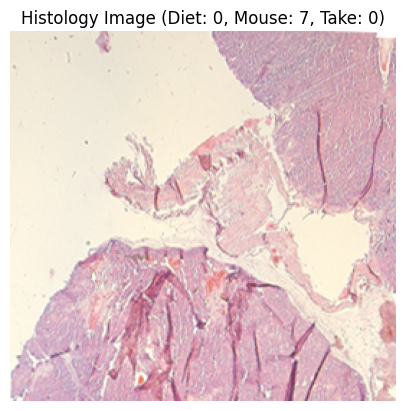

In [ ]:
# Retrieve the image from the dataset
#Busca y muestra una imagen de histologia especifica utilizando el dataset cargado como diccionario
image = dataset_dict.hist_img.get((0, 2, 0)) #intenta obtener la imagen de histologia asociada a la clave (0,7,0) del diccionario dataset_dict.hist_img usando .get()

if image is not None: #verifica si la imagen existe
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Histology Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.show()
else:
    print("No image found for the specified key (0, 7, 0).")

### As a `pandas.DataFrame`
One can define many machine learning tasks for which it's useful to have a dataframe where instead of having images as units of data, we have individual pixels as datapoints, with fluorescence values as attributes. Since this implies quite a cumbersome transformation, we provide this dataframe as a `frame` attribute when loading the dataset with `as_frame=True`.

In [ ]:
#carga el dataset de fluorescencia de manera diferente, especificando que los datos de pixeles se carguen directamente en un df de pandas
directory = 'data' #define la variable directory con la ruta en donde estan los datos
fluorescence = load_fluorescence(directory, as_frame=True) #llama a la funcion load_fluorescence para cargar el dataset. El argumento as_frame = True indica a la funcion que cree y devuelva un dataframe de pandas con los datos de pixeles
df = fluorescence.frame #accede al dataframe
df.head() #muestra las primeras 5 filas del df

,diet,mouse,take,row,col,Ca,Cu,Fe,K,Mn,P,S,Zn,label
0,1,30,0,0,0,334318000.0,19080300.0,42013600.0,0.0,11333300.0,0.0,0.0,10955300.0,NaN
1,1,30,0,0,1,258177000.0,1009980.0,43284200.0,0.0,23009100.0,0.0,0.0,4736710.0,NaN
2,1,30,0,0,2,261338000.0,5895980.0,52806500.0,0.0,20649500.0,0.0,0.0,12929700.0,NaN
3,1,30,0,0,3,299220000.0,0.0,55524200.0,0.0,27225900.0,0.0,0.0,5220230.0,NaN
4,1,30,0,0,4,171709000.0,24164500.0,37705700.0,0.0,24184300.0,0.0,0.0,7272030.0,NaN


In [ ]:
#Este DataFrame (df) tiene una estructura donde cada fila representa un píxel individual de todas las imágenes del dataset, y las columnas contienen información sobre ese píxel,
#como la dieta, el ratón, la toma, su posición (fila y columna en la imagen original), las intensidades de fluorescencia para cada elemento, y la etiqueta de tejido (si está disponible).

Now, you can inspect `df` as with any other `DataFrame`.

In [ ]:
df.shape #dimensiones del df que cargamos, nro de filas y nro de columnas

(175211, 14)

In [ ]:
df.info() #imprime informacion sobre el dataframe incluyendo tipo de indice, nro total de filas, nro de columnas, tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175211 entries, 0 to 175210
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   diet    175211 non-null  category
 1   mouse   175211 non-null  int64   
 2   take    175211 non-null  int64   
 3   row     175211 non-null  int64   
 4   col     175211 non-null  int64   
 5   Ca      175211 non-null  float64 
 6   Cu      175211 non-null  float64 
 7   Fe      175211 non-null  float64 
 8   K       175211 non-null  float64 
 9   Mn      175211 non-null  float64 
 10  P       175211 non-null  float64 
 11  S       175211 non-null  float64 
 12  Zn      175211 non-null  float64 
 13  label   23003 non-null   category
dtypes: category(2), float64(8), int64(4)
memory usage: 16.4 MB


In [ ]:
df['diet'].value_counts() #cuenta cuantos pixeles en el dataframe pertenecen a cada tipo de dieta

,count
diet,
0,72476
2,53325
1,49410


In [ ]:
df['mouse'].unique() #valores unicos presentes en la columna mouse del df
#La salida es una lista de nros de raton que estan en el df, nos da una idea de cuantos ratones contribuyen con pixeles al conjunto de datos

array([30, 37, 27, 31, 39, 29, 38, 33, 32, 35, 28, 36,  1, 11, 12,  8,  4,
        6, 10,  7,  9,  2, 19, 15, 18, 14, 17, 16, 21, 23, 25, 20, 26])

## Transformed Label Images
Since labels are obtained from the histological images, they do not originally have the size not the resolution of the fluorescence images (which is the limitting factor). Thus, we have to align the images, resize them, and downscale them. This is already done and available in the `dataset.img_labels` attribute.

In [ ]:
key = (0, 2, 0) #compara las formas (dimensiones) de tres tipos de imagenes diferentes para una muestra especifica identificada por la clave key

print(f"{dataset_dict.images[key].shape=}") #imprime la forma de la imagen de fluorescencia para la muestra con clave key (altura, ancho, nro de elementos)
print(f"{dataset_dict.hist_img_labels[key].shape=}") #imprime la forma de la imagen de etiquetas de histologia original para la misma muestra. Es la imagen de etiquetas antes de ser transformada (altura_original, ancho_original)
print(f"{dataset_dict.img_labels[key].shape=}") #imprime la forma de la imagen de etiquetas transformada para la misma muestra (altura, ancho)

dataset_dict.images[key].shape=(101, 101, 8)
dataset_dict.hist_img_labels[key].shape=(257, 268)
dataset_dict.img_labels[key].shape=(101, 101)


La salida de este código (dataset_dict.images[key].shape=(101, 101, 8), dataset_dict.hist_img_labels[key].shape=(257, 268), dataset_dict.img_labels[key].shape=(101, 101)) demuestra claramente que las imágenes de histología y sus etiquetas originales tienen un tamaño diferente al de las imágenes de fluorescencia, y que las img_labels transformadas sí coinciden en dimensiones (altura y ancho) con las imágenes de fluorescencia. Esto es un paso importante para poder realizar análisis que combinen datos de fluorescencia con etiquetas de tejido.

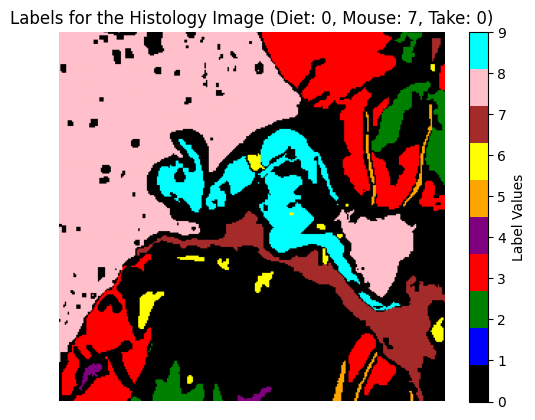

In [ ]:
# Visualiza la imagen de etiquetas de histologia ORIGINAL para la muestra especifica por la clave key = (0,2,0)
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan']
custom_cmap = ListedColormap(colors)

# Retrieve the labeled image from the dataset
labels_image = dataset_dict.hist_img_labels.get(key)

if labels_image is not None:
    # Display the labeled image
    plt.imshow(labels_image, cmap=custom_cmap)
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Labels for the Histology Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.colorbar(ticks=range(10), label="Label Values")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print("No labeled image found for the specified key (0, 7, 0).")



In [ ]:
#Esta visualización te permite ver la distribución espacial de los tipos de tejido en la imagen de histología original,
#antes de cualquier transformación para alinearla con las imágenes de fluorescencia.

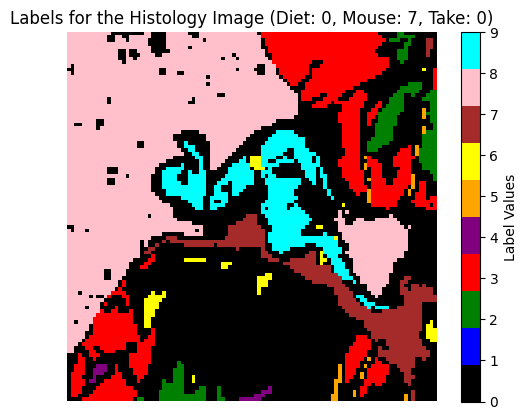

In [ ]:
# Visualiza la imagen de etiquetas de histologia TRANSFORMADA para la muestra especifica por la clave key = (0,2,0)
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan']
custom_cmap = ListedColormap(colors)

# Retrieve the labeled image from the dataset
labels_image = dataset_dict.img_labels.get(key)

if labels_image is not None:
    # Display the labeled image
    plt.imshow(labels_image, cmap=custom_cmap)
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Labels for the Histology Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.colorbar(ticks=range(10), label="Label Values")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print("No labeled image found for the specified key (0, 7, 0).")

Al comparar esta visualización con la de dataset_dict.hist_img_labels, podemos notar que la imagen tiene diferentes dimensiones, ajustadas para coincidir con las imágenes de fluorescencia. Esto es útil para análisis que requieren alinear los datos de fluorescencia con las etiquetas de tejido.

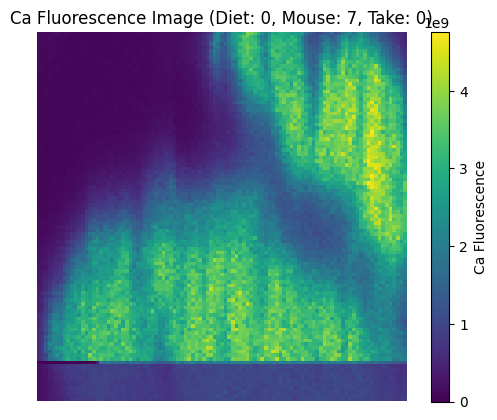

In [ ]:
# Visualiza la imagen de fluorescencia para el primer elemento (Calcio) de la muestra especificada por la clave key
labels_image = dataset_dict.images[key][:, :, 0] #recupera los datos de la img de fluorescencia seleccionando solo el primer canal, que corresponde a Ca

if labels_image is not None:
    # Display the labeled image
    plt.imshow(labels_image, cmap='viridis')
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Ca Fluorescence Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.colorbar(label="Ca Fluorescence")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print(f"No labeled image found for the specified key {key}.")

# Objetivo del análisis

El propósito de este trabajo es explorar un conjunto de datos que combina imágenes de fluorescencia de elementos químicos (como Calcio, Hierro, Zinc, etc.) con etiquetas histológicas de tejidos (tumoral, necrótico, conectivo, etc.), en muestras de ratones sometidos a diferentes dietas (control, omega-3, omega-6). Se busca detectar relaciones entre composición química, tipo de tejido y dieta.

# Filtrado de datos

In [ ]:
print(dataset.label_map)

{0: 'no label', 1: 'necrotic tissue', 2: 'tumoral A', 3: 'tumoral B', 4: 'tumoral C', 5: 'artifacts', 6: 'blood', 7: 'loose connective tissue', 8: 'no sample', 9: 'dense connective tissue', 10: 'paraffin'}


Mantendremos solo las etiquetas de tejido relevantes. Eliminaremos aquellas que no aporten informacion necesaria, como ser:
no label, artifacts, no sample, parafin

In [ ]:
#Cargar dataset como DataFrame y aplicar filtro

fluorescence = load_fluorescence('data', as_frame=True)
df = fluorescence.frame

labels_to_keep = [1, 2, 3, 4, 6, 7, 9]
label_mapp = {
    1: 'necrotic tissue',
    2: 'tumoral A',
    3: 'tumoral B',
    4: 'tumoral C',
    6: 'blood',
    7: 'loose connective tissue',
    9: 'dense connective tissue'
}

df_filtered = df[df['label'].isin(labels_to_keep)].copy()
df_filtered['label_name'] = df_filtered['label'].map(label_mapp)

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered.shape}")
print(df_filtered['label_name'].value_counts())

Original shape: (175211, 14)
Filtered shape: (9443, 15)
label_name
tumoral B                  4042
tumoral A                  3905
loose connective tissue     804
dense connective tissue     566
blood                       100
tumoral C                    26
Name: count, dtype: int64


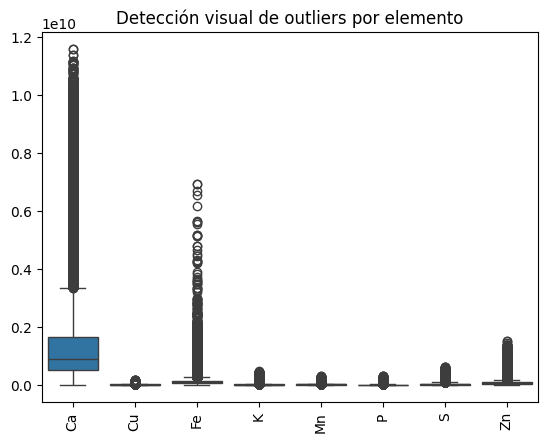

In [ ]:
df.isnull().sum()  # valores faltantes

# Detectar outliers (visualmente)
sns.boxplot(data=df[dataset.element_order])
plt.xticks(rotation=90)
plt.title("Detección visual de outliers por elemento")
plt.show()

In [ ]:
print(df_filtered.describe()) #Estadistica descriptiva post filtrado

             mouse    take          row          col            Ca  \
count  9443.000000  9443.0  9443.000000  9443.000000  9.443000e+03   
mean      4.592396     0.0    48.677645    53.608069  1.258737e+09   
std       5.750755     0.0    28.708862    29.379112  9.196574e+08   
min       2.000000     0.0     0.000000     0.000000  0.000000e+00   
25%       2.000000     0.0    24.000000    28.000000  6.763440e+08   
50%       4.000000     0.0    47.000000    55.000000  8.620100e+08   
75%       4.000000     0.0    74.000000    80.000000  1.409420e+09   
max      32.000000     0.0   100.000000   100.000000  4.756700e+09   

                 Cu            Fe             K            Mn             P  \
count  9.443000e+03  9.443000e+03  9.443000e+03  9.443000e+03  9.443000e+03   
mean   8.535869e+06  8.691461e+07  1.121771e+07  7.723549e+06  7.296107e+06   
std    8.137117e+06  8.795340e+07  1.432884e+07  6.618135e+06  9.577268e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.00

# Analisis descriptivo

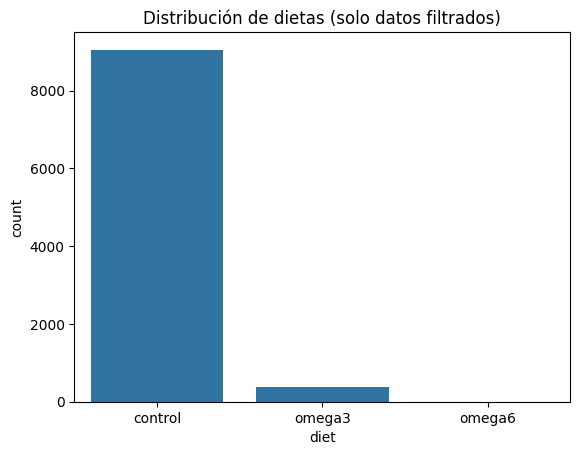

In [ ]:
# Distribución de dietas
sns.countplot(data=df_filtered, x='diet')
plt.xticks(ticks=[0,1,2], labels=dataset.diet_names)
plt.title('Distribución de dietas (solo datos filtrados)')
plt.show()

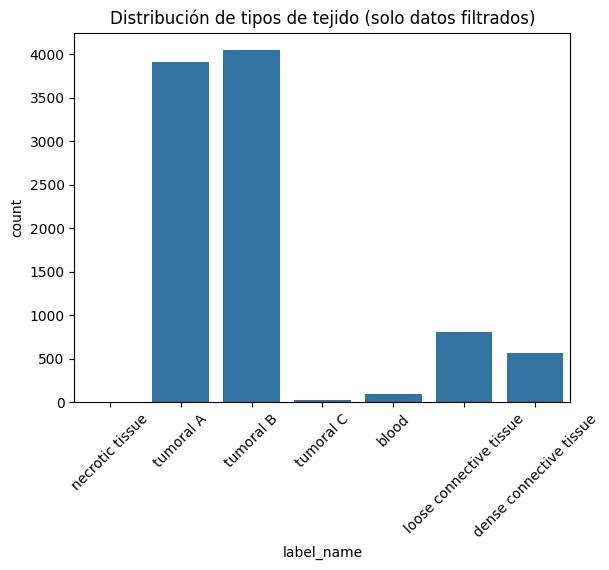

In [ ]:
# Distribución de tipos de tejido
sns.countplot(data=df_filtered, x='label_name', order=label_mapp.values())
plt.xticks(rotation=45)
plt.title('Distribución de tipos de tejido (solo datos filtrados)')
plt.show()

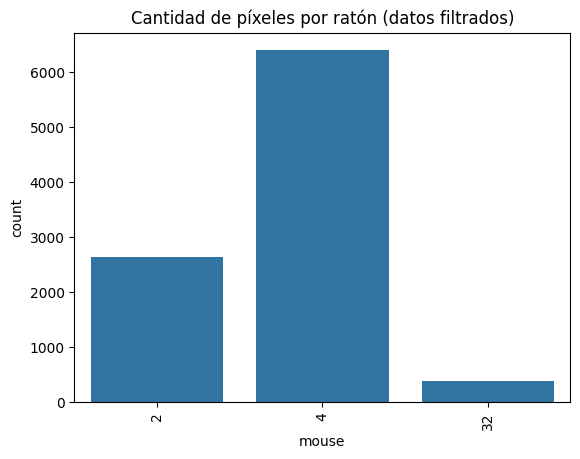

In [ ]:
# Cantidad de imágenes por ratón (usamos countplot de pixeles)
sns.countplot(data=df_filtered, x='mouse')
plt.title("Cantidad de píxeles por ratón (datos filtrados)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df_filtered.describe())

             mouse    take          row          col            Ca  \
count  9443.000000  9443.0  9443.000000  9443.000000  9.443000e+03   
mean      4.592396     0.0    48.677645    53.608069  1.258737e+09   
std       5.750755     0.0    28.708862    29.379112  9.196574e+08   
min       2.000000     0.0     0.000000     0.000000  0.000000e+00   
25%       2.000000     0.0    24.000000    28.000000  6.763440e+08   
50%       4.000000     0.0    47.000000    55.000000  8.620100e+08   
75%       4.000000     0.0    74.000000    80.000000  1.409420e+09   
max      32.000000     0.0   100.000000   100.000000  4.756700e+09   

                 Cu            Fe             K            Mn             P  \
count  9.443000e+03  9.443000e+03  9.443000e+03  9.443000e+03  9.443000e+03   
mean   8.535869e+06  8.691461e+07  1.121771e+07  7.723549e+06  7.296107e+06   
std    8.137117e+06  8.795340e+07  1.432884e+07  6.618135e+06  9.577268e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.00

# Analisis estadistico

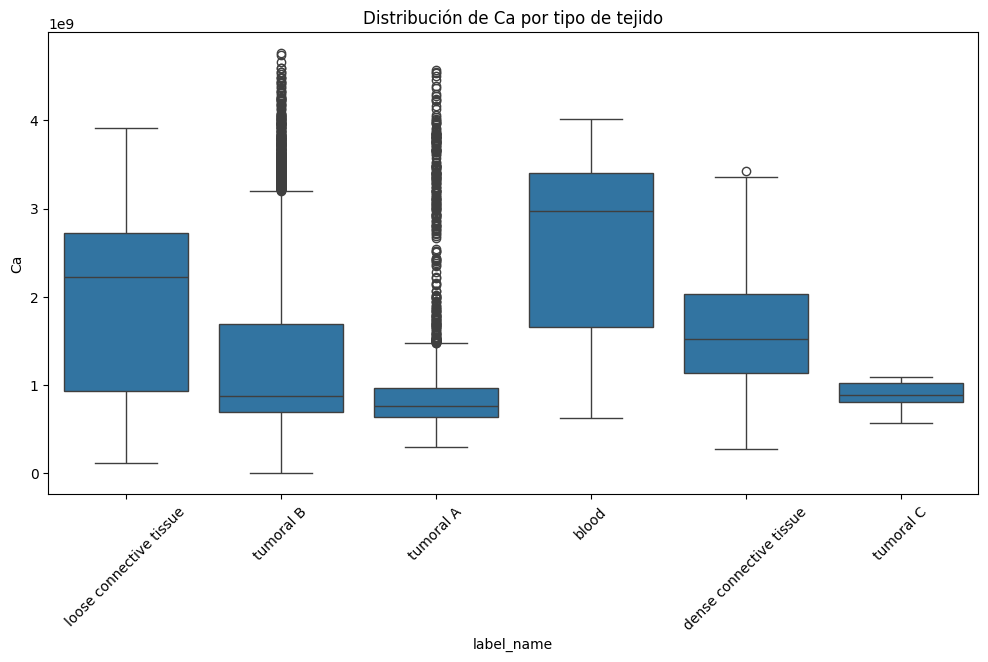

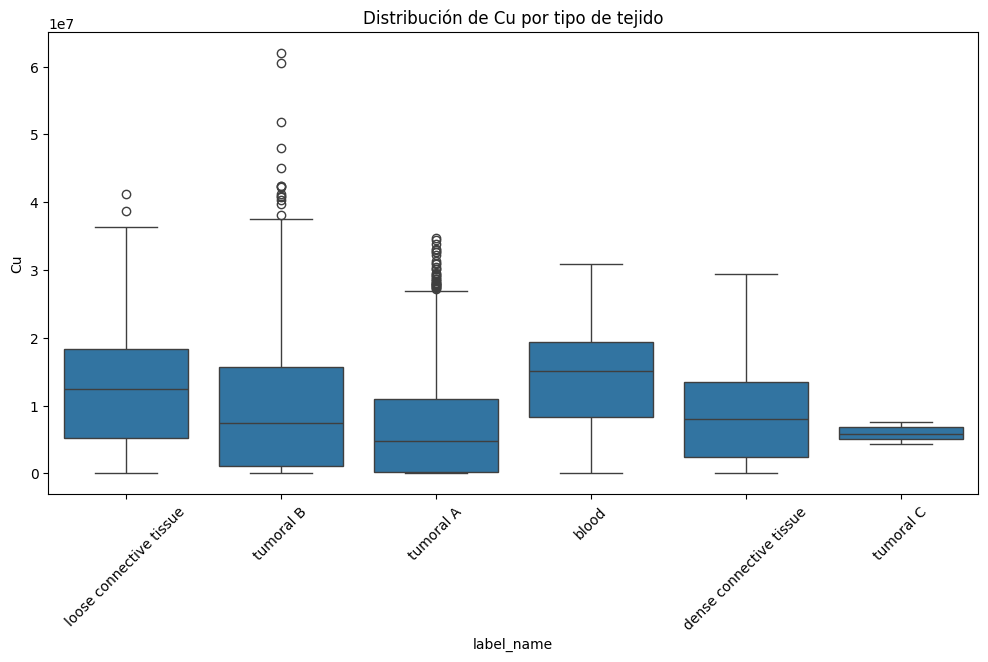

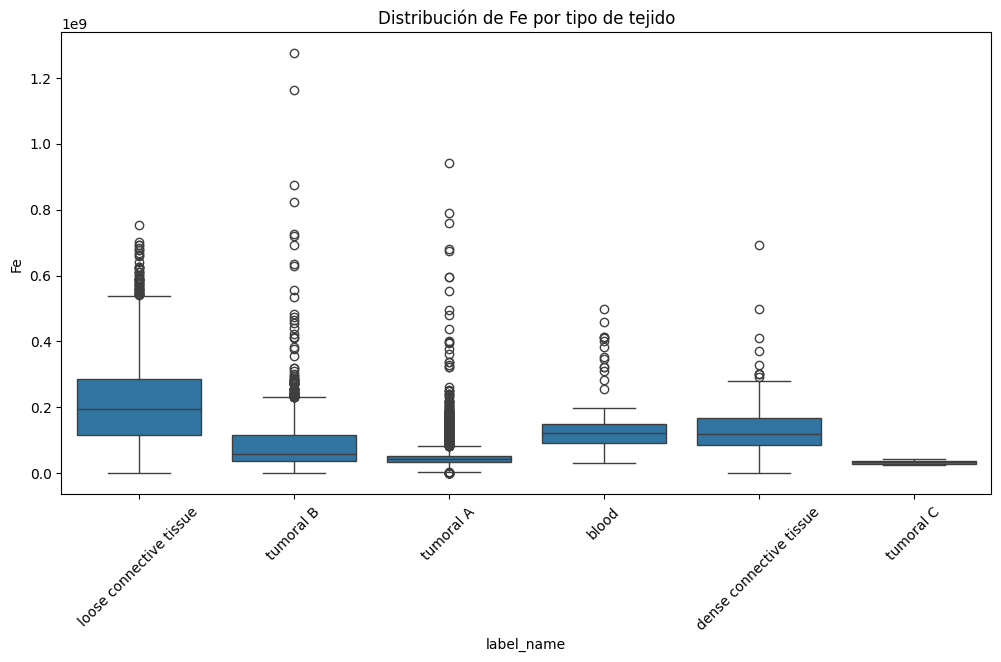

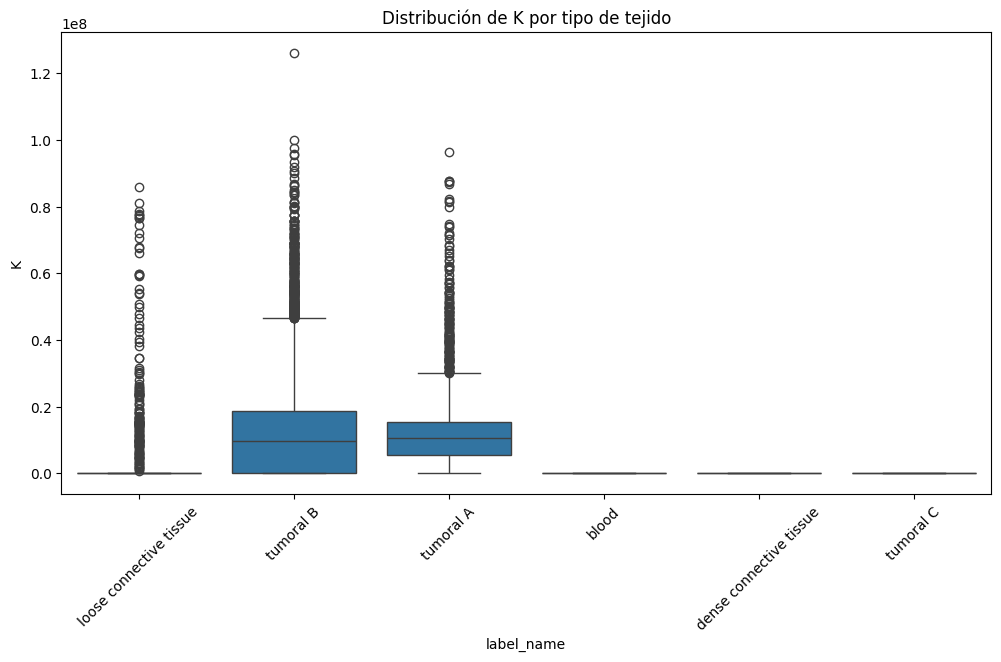

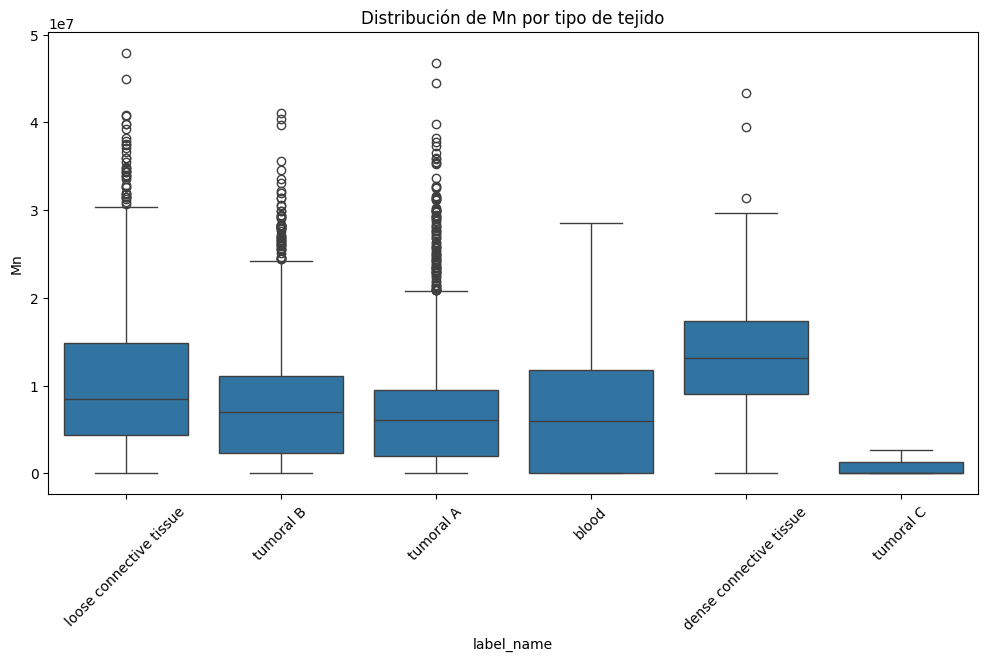

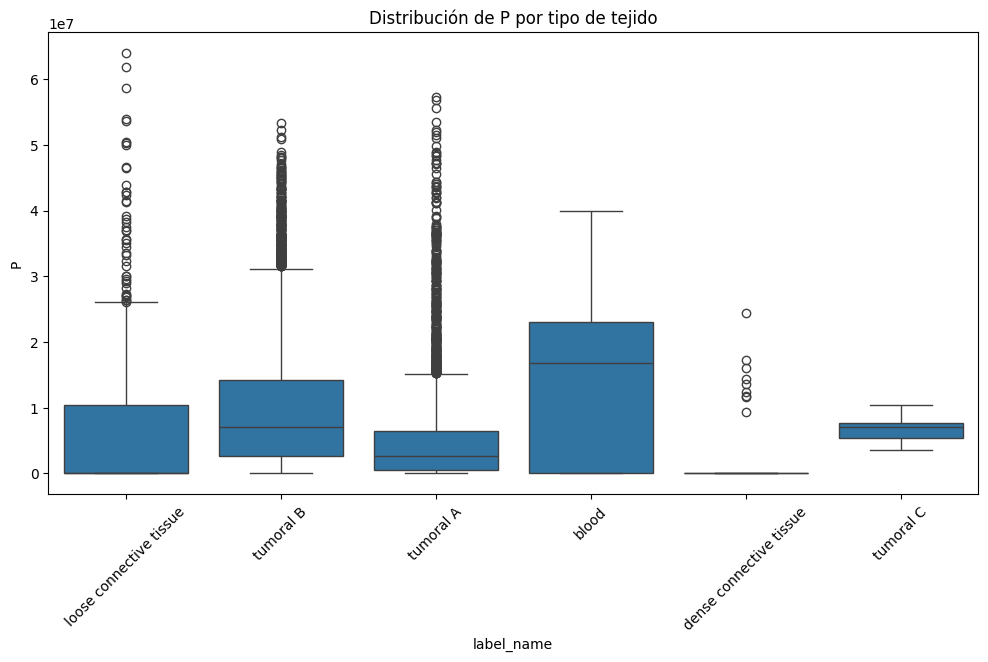

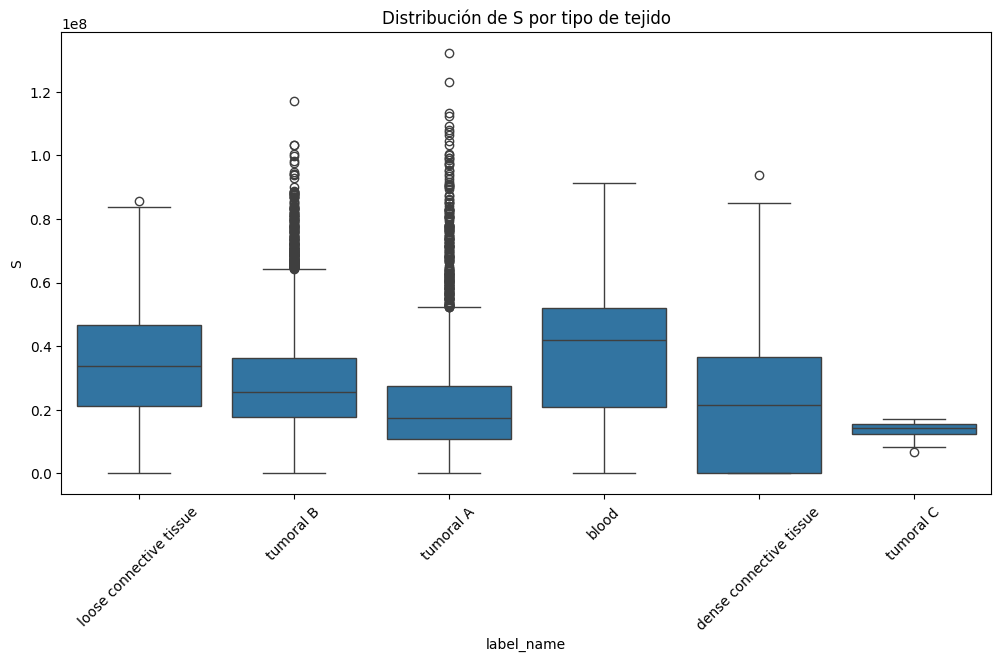

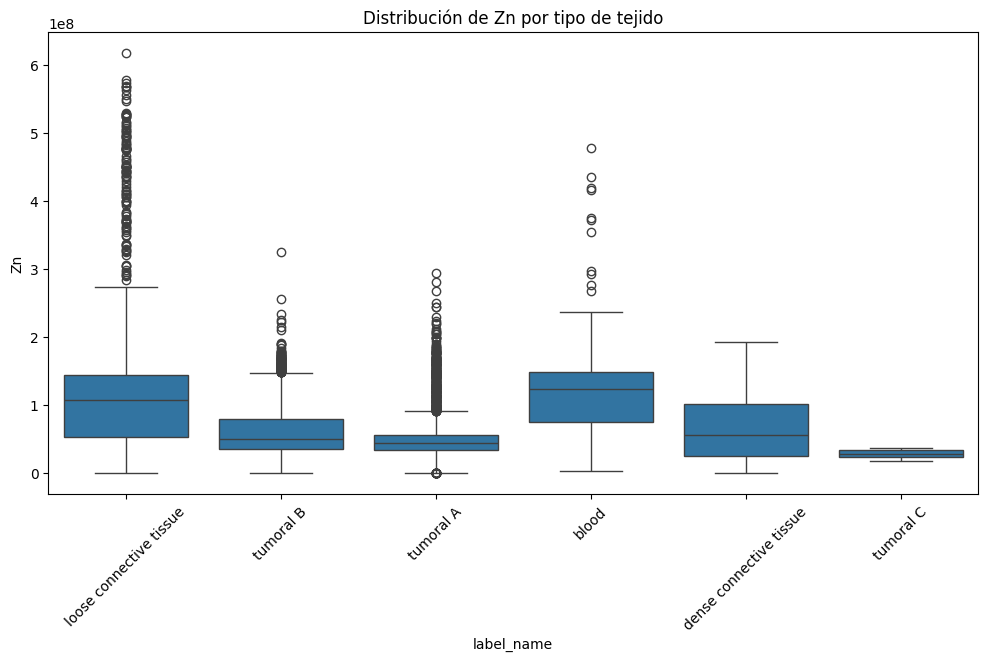

In [ ]:
# Boxplots por tipo de tejido: para ver si hay elementos que discriminan mejor entre tejidos
for element in dataset.element_order:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label_name', y=element, data=df_filtered)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {element} por tipo de tejido")
    plt.show()

In [ ]:
# test de hipotesis, t-students entre pares para cada elemento quimico, independientes?

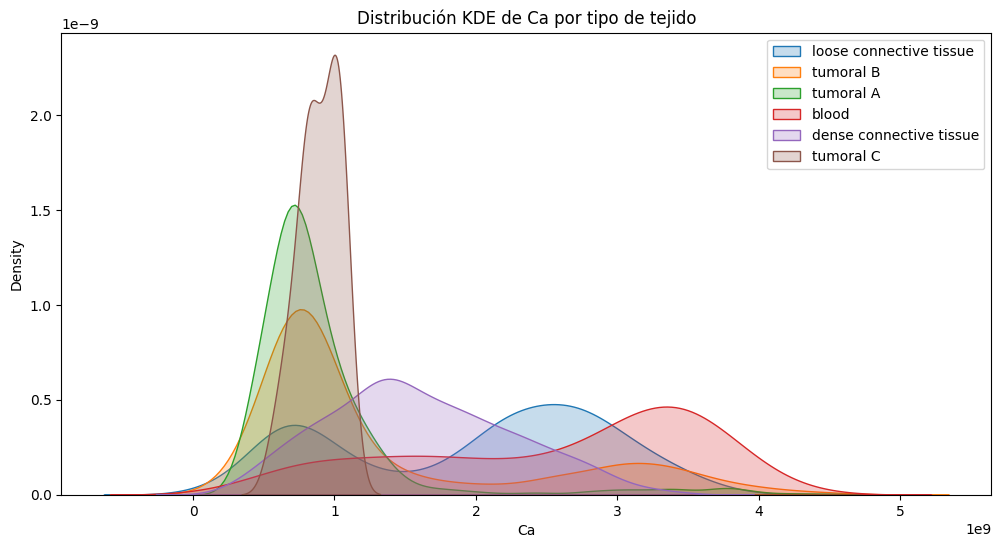

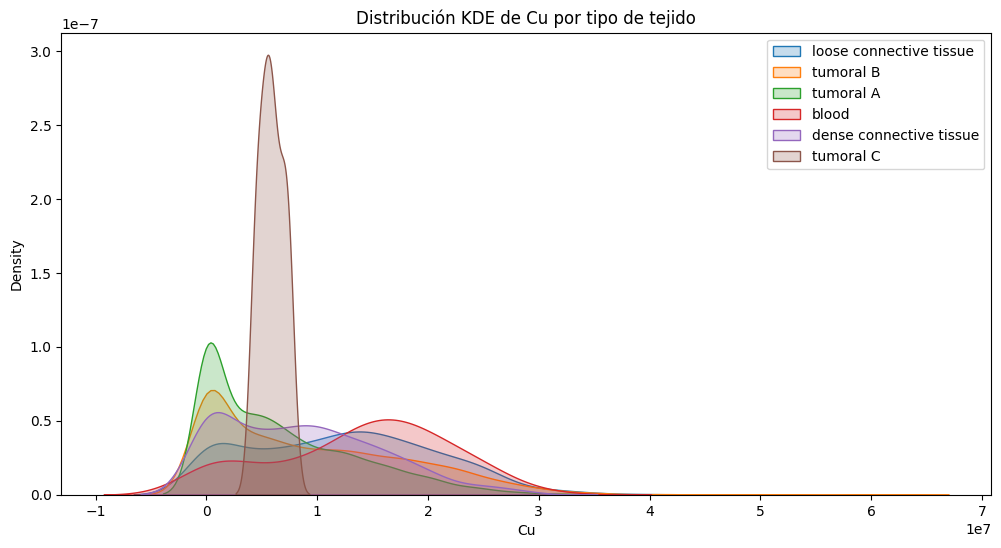

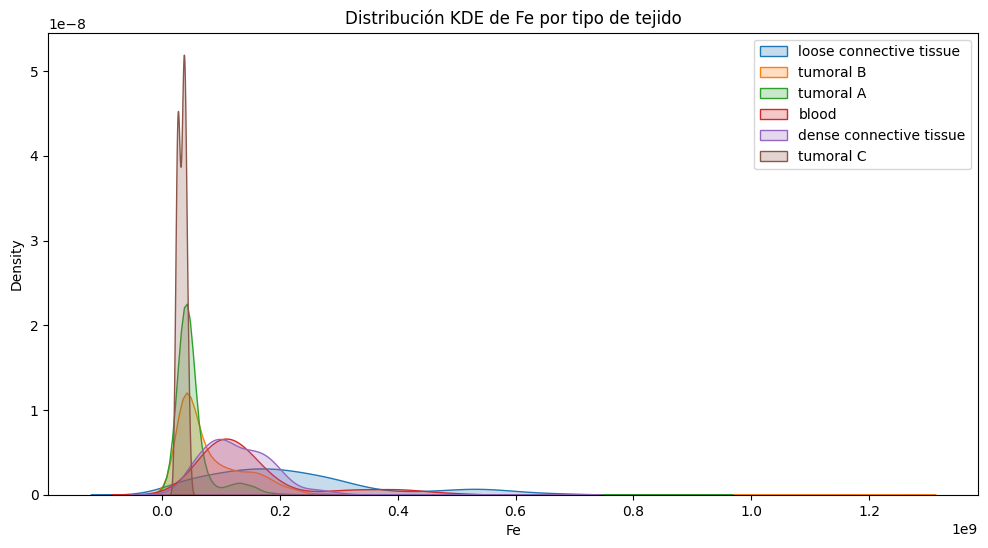

/tmp/ipython-input-638-3448816535.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-638-3448816535.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-638-3448816535.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


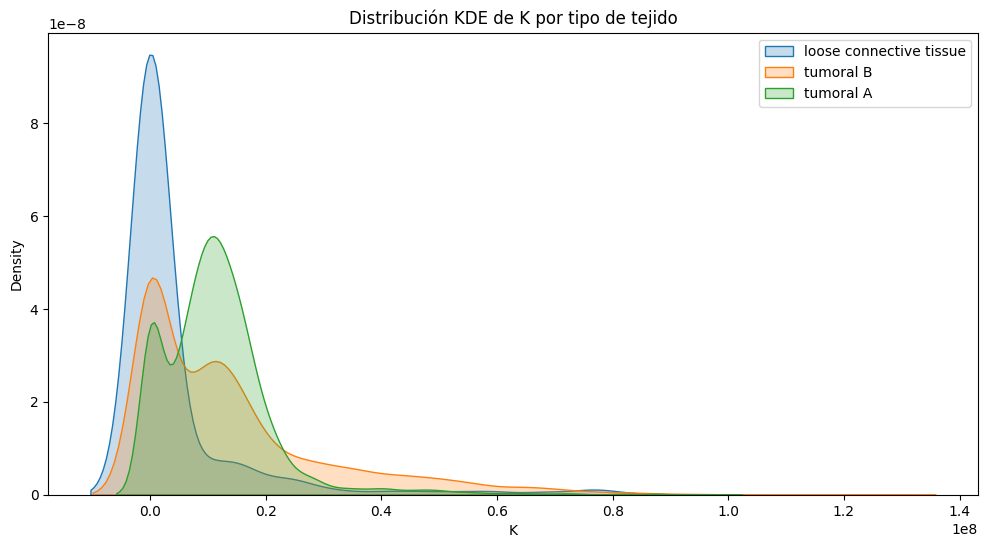

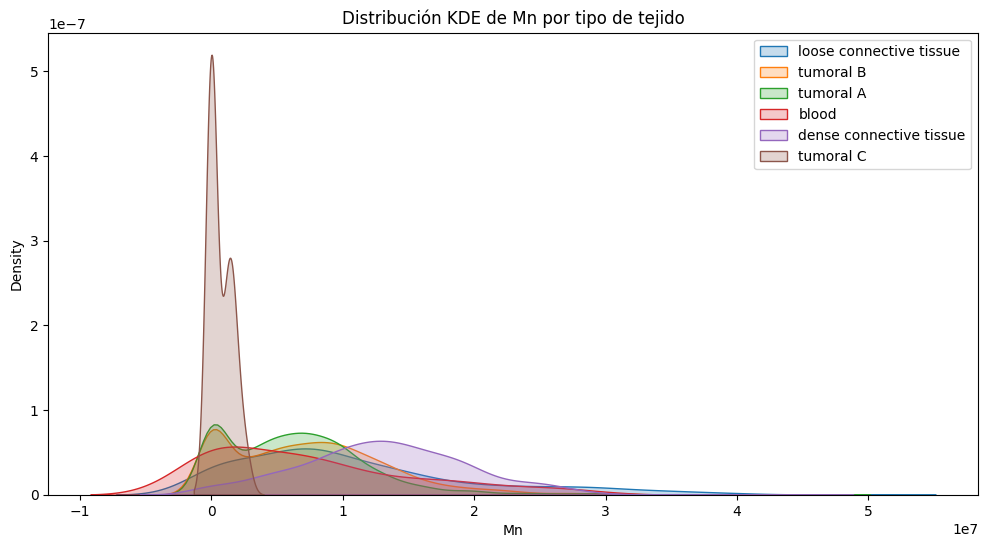

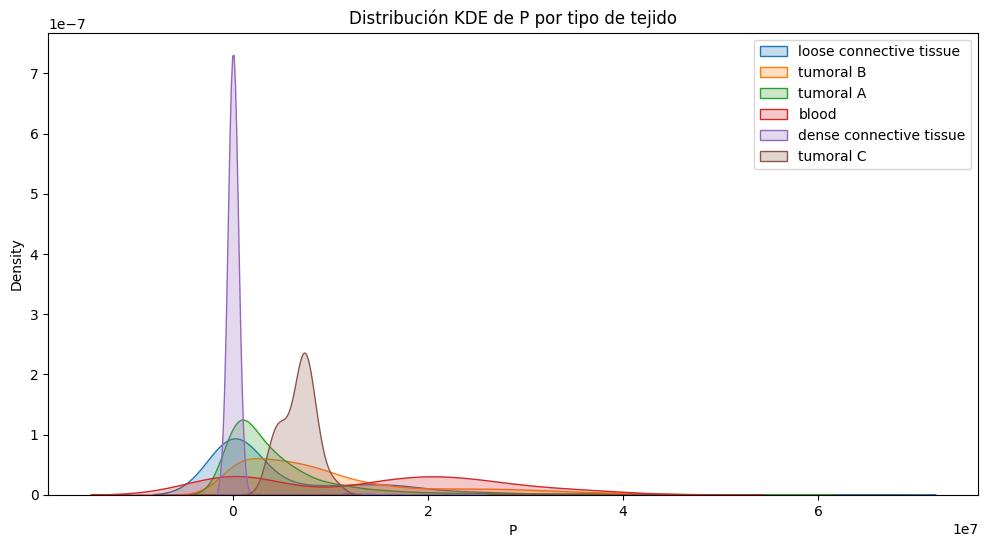

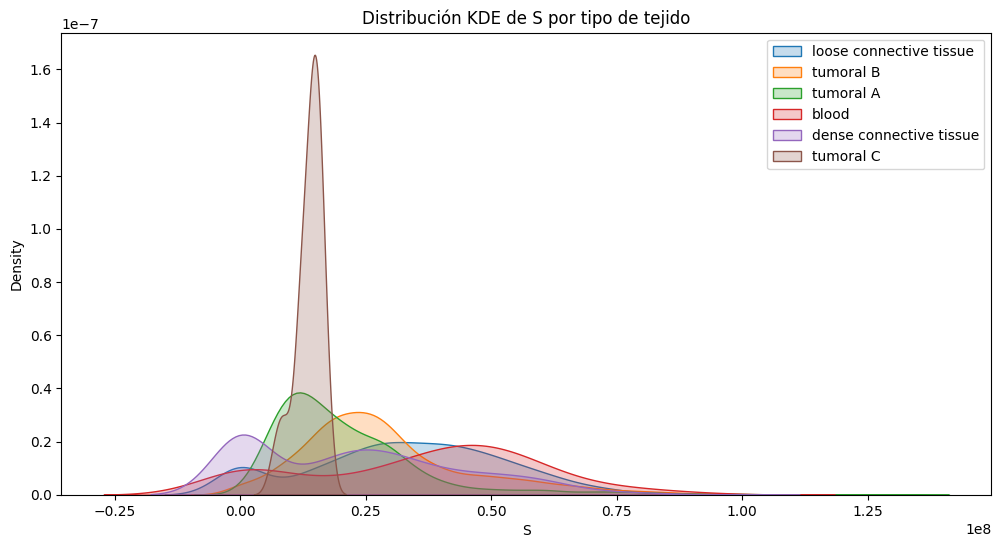

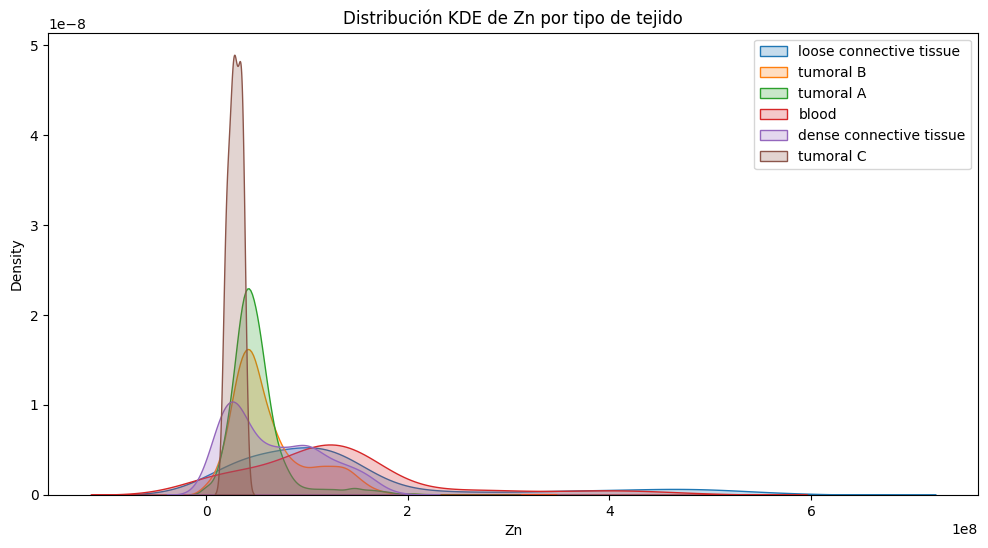

In [ ]:
# Distribución KDE de cada elemento por tipo de tejido
for element in dataset.element_order:
    plt.figure(figsize=(12,6))
    for label_id in df_filtered['label'].unique():
        sns.kdeplot(
            df_filtered[df_filtered['label'] == label_id][element],
            label=label_mapp[label_id], fill=True
        )
    plt.title(f'Distribución KDE de {element} por tipo de tejido')
    plt.legend()
    plt.show()

Basandonos en las graficas de distribucion KDE, podemos observar rangos de intensidad donde ciertos elementos quimicos tienen una alta densidad de pixeles en diferentes tipos de tejido. Esto indica concentraciones frecuentes o predominantes en esos tejidos:

*   **Calcio (Ca):** Se observan picos de alta densidad en rangos elevados de fluorescencia para los tumores (tumoral C, tumoral A y tumoral B), indicando que muchos píxeles en estos tejidos tienen altas concentraciones de Calcio en comparación con otros elementos.
*   **Hierro (Fe):** Similar al Calcio, presenta picos de alta densidad en rangos altos para los tumores (tumoral C, tumoral A y tumoral B).
*   **Zinc (Zn):** Alta densidad de píxeles con concentraciones elevadas en los tumores (tumoral C, A y B), así como en "dense connective tissue".
*   **Azufre (S):** Se observa una notable diferencia en los rangos de alta densidad entre los tumores, siendo el tumor C el que presenta picos en intensidades más altas.
*   **Fósforo (P):** A diferencia de otros elementos, aquí se observa una mayor densidad de píxeles con concentraciones elevadas en "dense connective tissue", seguido por los tumores C y A.

Etiquetas presentes después del filtro: [7.0, 3.0, 2.0, 6.0, 9.0, 4.0]
Categories (10, float64): [0.0, 2.0, 3.0, 4.0, ..., 7.0, 8.0, 9.0, 10.0]


/tmp/ipython-input-639-297398474.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profiles = df_filtered.groupby('label')[dataset.element_order].mean().T


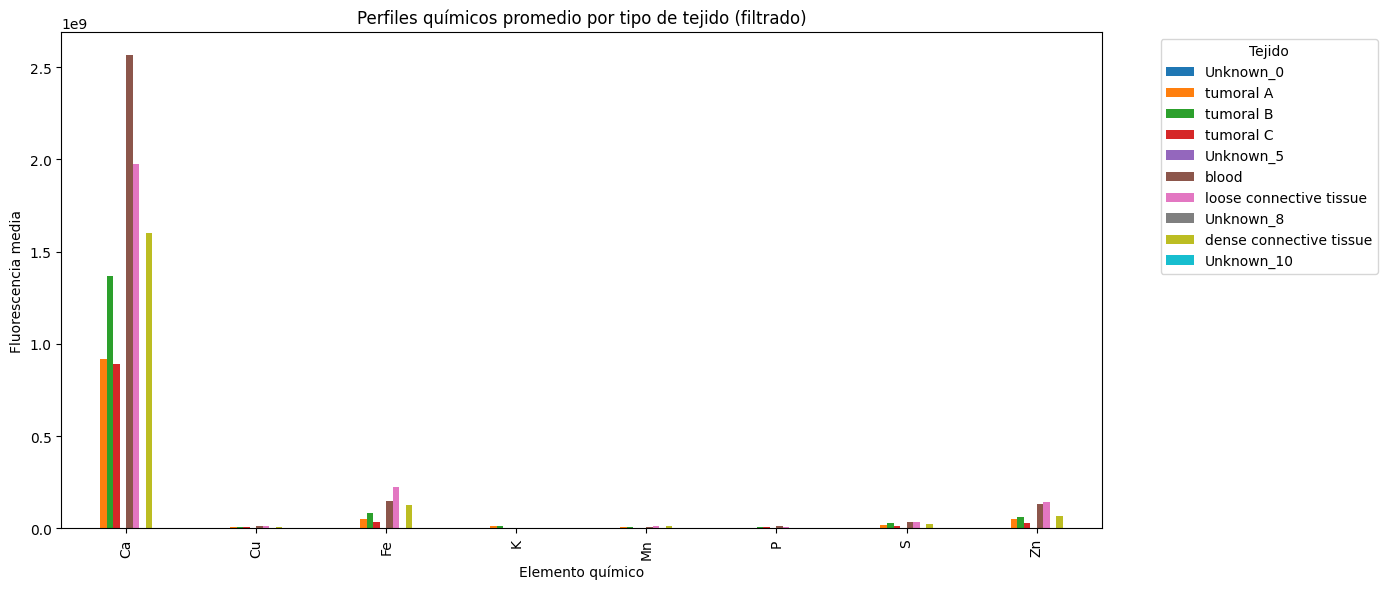

In [ ]:
# Media de cada elemento por tipo de tejido
# Filtrar SOLO los tipos de tejido deseados
labels_keep = [1, 2, 3, 4, 6, 7, 9]
df_filtered = df[df['label'].isin(labels_keep)].copy()

print("Etiquetas presentes después del filtro:", df_filtered['label'].unique())

# Calcular medias
mean_profiles = df_filtered.groupby('label')[dataset.element_order].mean().T

# Mapea nombres de labels
mean_profiles.columns = [label_mapp.get(int(l), f'Unknown_{int(l)}') for l in mean_profiles.columns]

# Plot
mean_profiles.plot(kind='bar', figsize=(14,6))
plt.title('Perfiles químicos promedio por tipo de tejido (filtrado)')
plt.ylabel('Fluorescencia media')
plt.xlabel('Elemento químico')
plt.legend(title='Tejido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Los elementos con mayor presencia promedio son:
* **Ca (Calcio):** Muestra diferencias notables en la concentración promedio entre los tipos de tejido. Parece ser muy elevado en "blood" y "loose connective tissue", "dense connective tissue" y tumor B.
* **Fe (Hierro):** Es alto en "loose connective tissue", "blood", "dense connective tissue" y tumor B
* **Zn (Zinc):** Alto en "loose connective tissue", "blood" y "dense connective tissue".
* **S (Azufre):** Las concentraciones de Azufre también varían entre tejidos, con niveles elevados en los tejidos tumorales, "blood" y "loose connective tissue".


In [ ]:
# Opcional: test de hipótesis
from scipy.stats import ttest_ind

ca_A = df_filtered[df_filtered['label']==2]['Ca']
ca_B = df_filtered[df_filtered['label']==3]['Ca']
t_stat, p_val = ttest_ind(ca_A, ca_B, equal_var=False)
print(f"T-test Ca (tumoral A vs tumoral B): t={t_stat:.2f}, p={p_val:.4f}")

T-test Ca (tumoral A vs tumoral B): t=-23.54, p=0.0000


# Correlaciones entre elementos quimicos

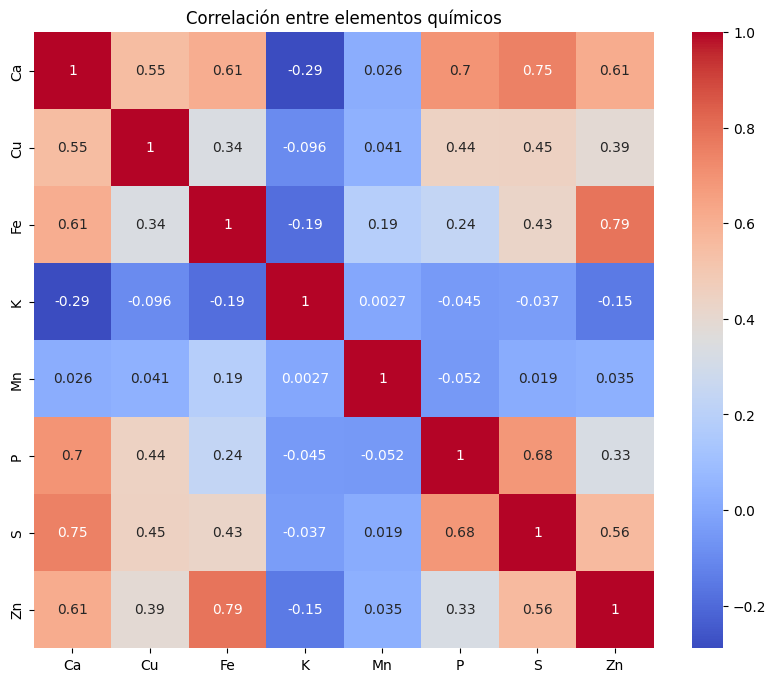

In [ ]:
#Para ver si hay elementos que aparecen juntos o se inhiben mutuamente
corr = df_filtered[dataset.element_order].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlación entre elementos químicos")
plt.show()

Se observan correlaciones positivas entre:
* Fe y Zn: 0.79
* Ca y S: 0.75
* Ca y P: 0.7
* P y S: 0.68
* Ca y Fe: 0.61
* Ca y Zn: 0.61
* S y Zn: 0.56
* Ca y Cu: 0.55


# ¿La dieta tiene efecto sobre la composicion quimica de los tumores?

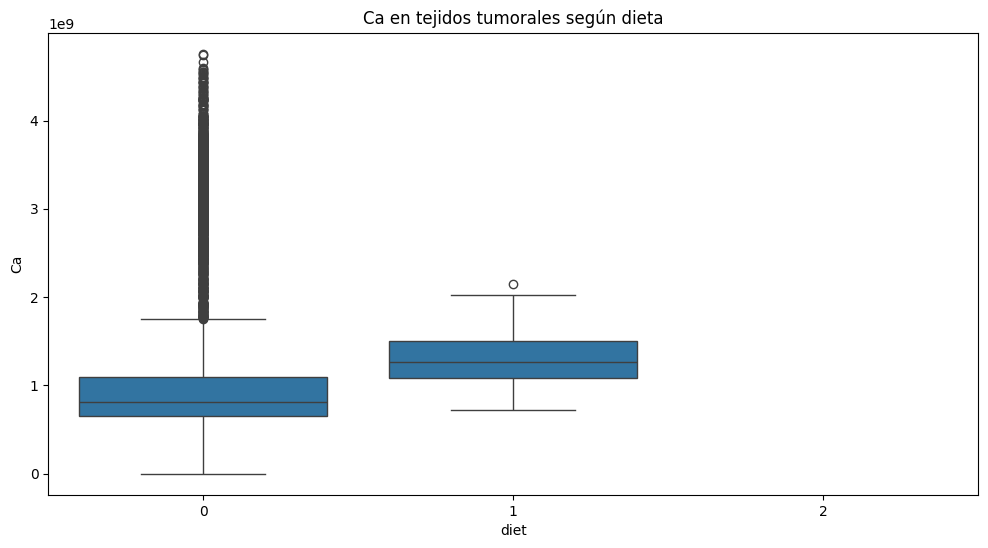

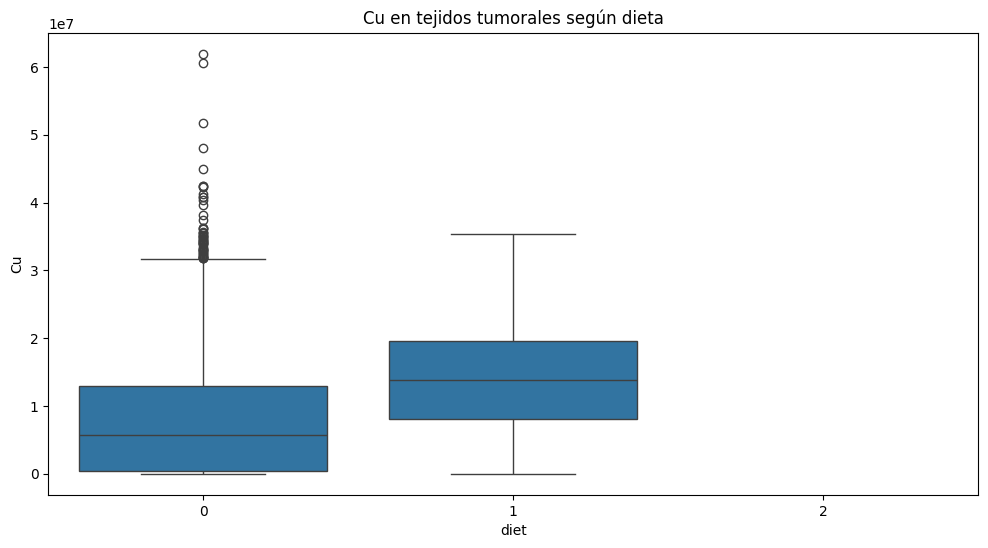

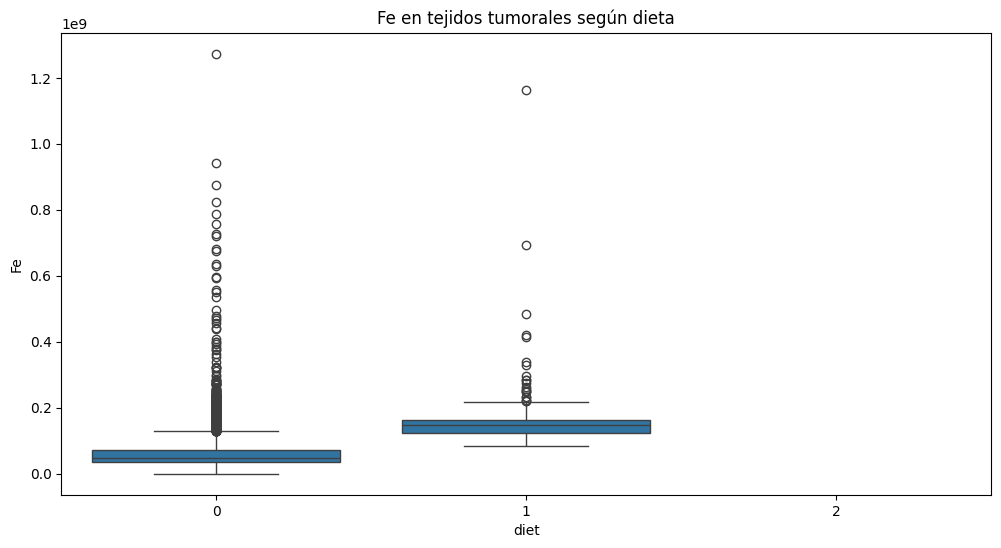

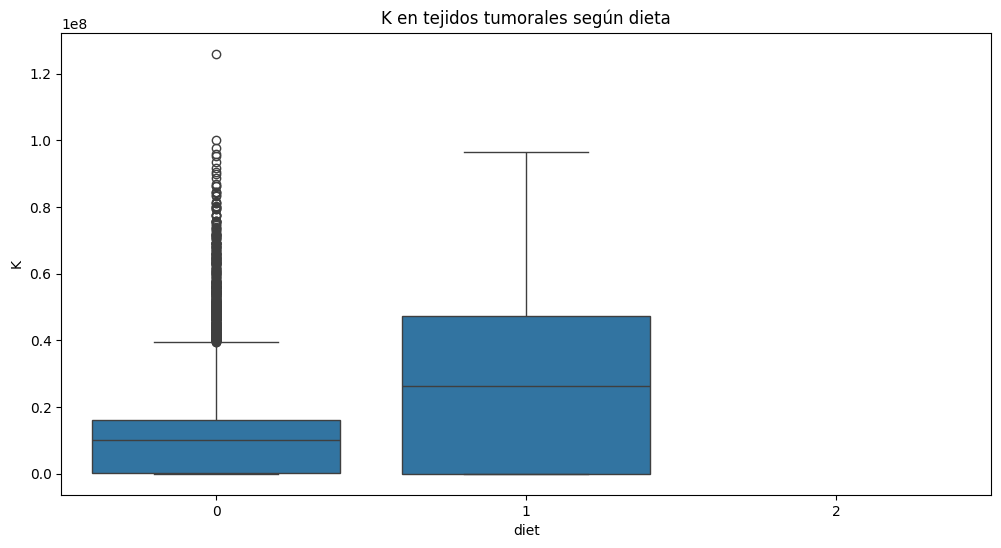

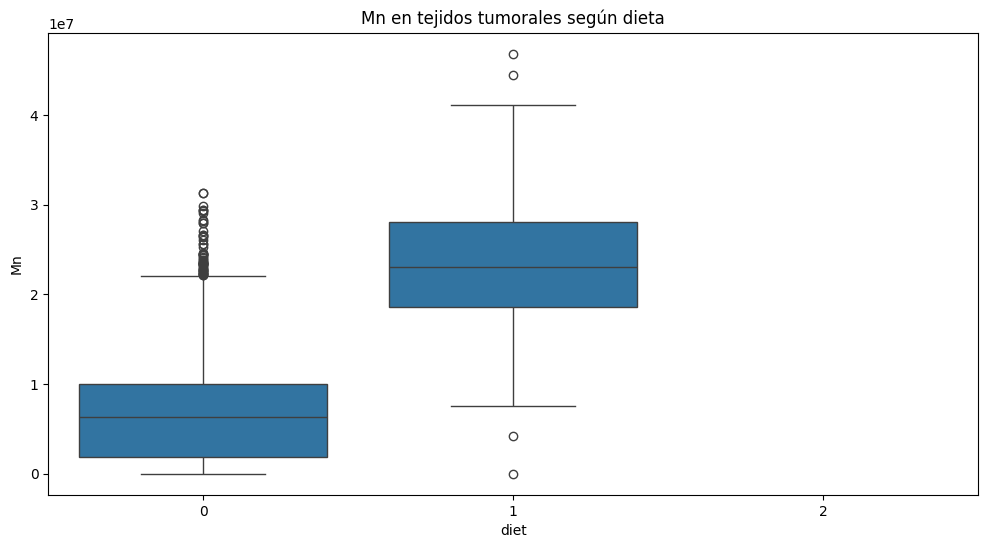

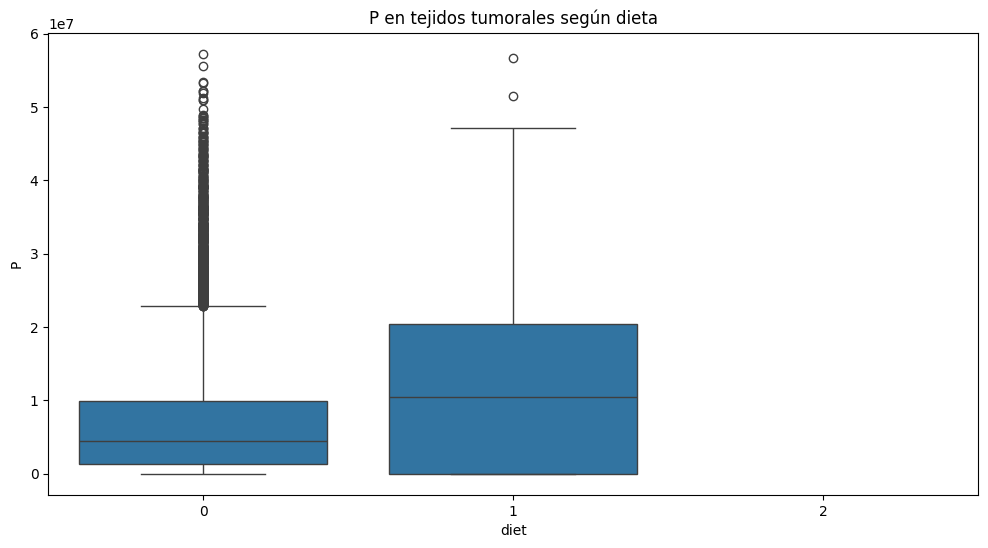

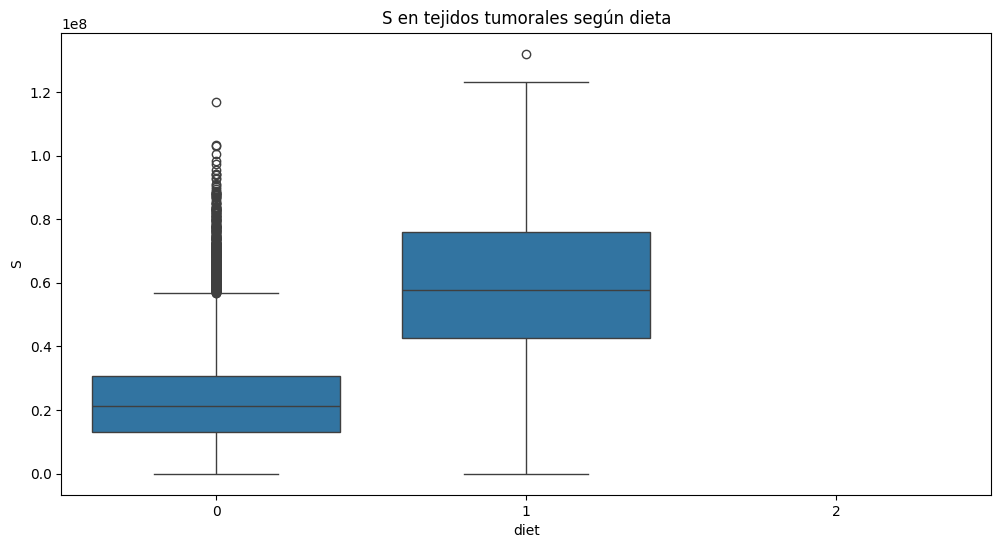

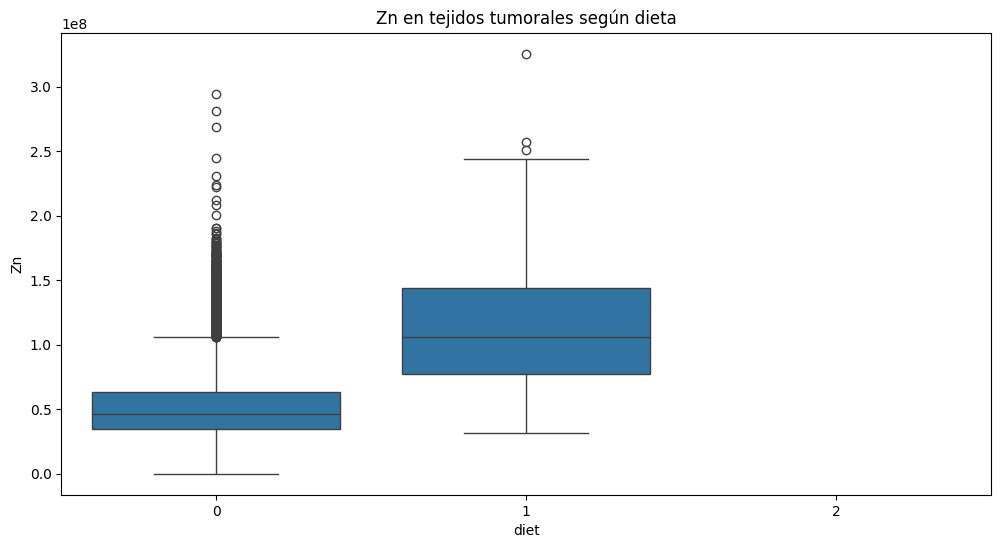

In [ ]:
# Comparar un elemento para tumores segun dieta
tumor_labels = [2, 3, 4]
tumoral = df[df['label'].isin(tumor_labels)]

for element in dataset.element_order:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='diet', y=element, data=tumoral)
    plt.title(f"{element} en tejidos tumorales según dieta")
    plt.show()

Basandonos unicamente en la inspeccion visual de estos boxplots, parece que la dieta podria tener un efecto observable en la composicion química de los tumores para algunos elementos, como el Calcio (Ca), Hierro (Fe), Fosforo (P), Azufre (S) y Zinc (Zn), ya que se aprecian algunas diferencias en la mediana y la dispersion entre los grupos de dieta

In [ ]:
from scipy import stats

# Seleccionar solo los datos de tejidos tumorales
tumor_labels = [2, 3, 4]
tumoral_df = df_filtered[df_filtered['label'].isin(tumor_labels)].copy()

print("Realizando test de ANOVA para cada elemento en tejidos tumorales por dieta:")

# Realizar ANOVA para cada elemento
anova_results = {}
for element in dataset.element_order:
    # Crear listas de concentraciones del elemento para cada dieta
    diet_groups = [tumoral_df[tumoral_df['diet'] == diet_id][element].dropna() for diet_id in tumoral_df['diet'].unique()]

    # Asegurarse de que haya al menos dos grupos con datos para ANOVA
    valid_groups = [group for group in diet_groups if len(group) > 1]

    if len(valid_groups) >= 2:
        # Realizar el test de ANOVA
        f_statistic, p_value = stats.f_oneway(*valid_groups)
        anova_results[element] = {'F-statistic': f_statistic, 'P-value': p_value}
        print(f"  {element}: F-statistic={f_statistic:.4f}, P-value={p_value:.4f}")
    else:
        print(f"  {element}: No se pueden realizar pruebas ANOVA (menos de 2 grupos con datos).")

print("\nResultados completos de ANOVA:")
for element, result in anova_results.items():
    print(f"  {element}: F-statistic={result['F-statistic']:.4f}, P-value={result['P-value']:.4f}")

Realizando test de ANOVA para cada elemento en tejidos tumorales por dieta:
  Ca: F-statistic=7.0468, P-value=0.0080
  Cu: F-statistic=122.6970, P-value=0.0000
  Fe: F-statistic=550.3346, P-value=0.0000
  K: F-statistic=324.7795, P-value=0.0000
  Mn: F-statistic=2124.6356, P-value=0.0000
  P: F-statistic=51.2321, P-value=0.0000
  S: F-statistic=1025.6068, P-value=0.0000
  Zn: F-statistic=699.2216, P-value=0.0000

Resultados completos de ANOVA:
  Ca: F-statistic=7.0468, P-value=0.0080
  Cu: F-statistic=122.6970, P-value=0.0000
  Fe: F-statistic=550.3346, P-value=0.0000
  K: F-statistic=324.7795, P-value=0.0000
  Mn: F-statistic=2124.6356, P-value=0.0000
  P: F-statistic=51.2321, P-value=0.0000
  S: F-statistic=1025.6068, P-value=0.0000
  Zn: F-statistic=699.2216, P-value=0.0000


Con base en estos resultados de ANOVA, podemos concluir que para todos los elementos quimicos analizados (Ca, Cu, Fe, K, Mn, P, S, Zn), existe una diferencia estadísticamente significativa en la concentracion promedio dentro de los tejidos tumorales entre los diferentes grupos de dieta.

Esto apoya la hipótesis de que la dieta de los ratones tiene un efecto observable y estadísticamente significativo en la composición elemental de los tumores.

# Visualizacion espacial

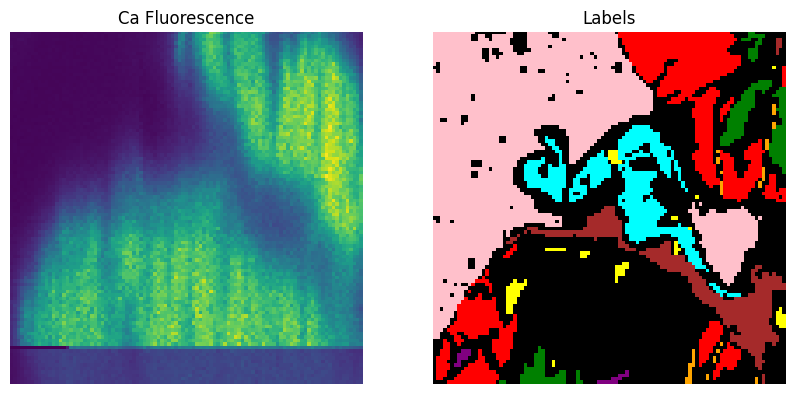

In [ ]:
key = (0, 2, 0)  # Cambiar clave si es necesario
dataset_dict = load_fluorescence('data', as_dict=True)

image = dataset_dict.images[key][:,:,0]  # Primer canal (Ca)
labels = dataset_dict.img_labels[key]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='viridis')
plt.title("Ca Fluorescence")
plt.axis('off')

plt.subplot(1,2,2)
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan']
custom_cmap = ListedColormap(colors)
plt.imshow(labels, cmap=custom_cmap)
plt.title("Labels")
plt.axis('off')

plt.show()

# Algunas preguntas

* ¿Qué elementos químicos presentan mayor presencia o
variabilidad en los diferentes tipos de tejido?
* ¿Existen combinaciones elementales características
asociadas a tipos específicos de tejido?
* ¿Qué correlaciones o patrones de co-ocurrencia existen
entre los distintos elementos?
* ¿La dieta de los ratones tiene un efecto observable sobre
la composición elemental de los tumores?

In [ ]:
# Filtramos los datos para cada elemento químico y creamos un DataFrame con las columnas relevantes
df_label_Ca = df[df['Ca'] > 0][['diet_name','Ca','label_name','diet','label']]
df_label_Cu = df[df['Cu'] > 0][['diet_name','Cu','label_name','diet','label']]
df_label_Fe = df[df['Fe'] > 0][['diet_name','Fe','label_name','diet','label']]
df_label_K = df[df['K'] > 0][['diet_name','K','label_name','diet','label']]
df_label_Mn = df[df['Mn'] > 0][['diet_name','Mn','label_name','diet','label']]
df_label